In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Race in America.csv')
df

,user_country,source,content,date
0,"Michigan, USA",Twitter Web App,@THICCOLINI @ZuzuQueenOfMars @HermitKingoMars ...,2020-09-29T23:55:25+00:00
1,NaN,Twitter for Android,@omggblake @PeteButtigieg Oh really has Al Sha...,2020-09-29T23:54:27+00:00
2,New York City,Twitter Web App,PBS Releases Trailer for DRIVING WHILE BLACK: ...,2020-09-29T23:51:07+00:00
3,"Surrey, British Columbia",Twitter for Android,@FansMcenany @JudgeJeaninefan HAHAHAHA. How ca...,2020-09-29T23:42:06+00:00
4,"Virginia, USA",Twitter for iPad,"@BarackObama In America, Black Lives Matter be...",2020-09-29T23:35:47+00:00
...,...,...,...,...
205,"Cambridge, MA",Twitter for iPhone,@niespika @EPoe187 (Eg see “race in North Amer...,2020-09-29T00:41:06+00:00
206,NaN,Twitter Web App,@MindUnguent @cmclymer Black people are not op...,2020-09-29T00:31:40+00:00
207,"Saugus, MA",Twitter for iPhone,@kalli1110 @tomshattuck Don’t you love “Virtue...,2020-09-29T00:28:27+00:00
208,NaN,Twitter Web App,@nowthisnews Of course it is for him. He's ri...,2020-09-29T00:13:46+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

8549
['@thiccolini', '@zuzuqueenofmars', '@hermitkingomars', '@michaeltanuvasa', 'socialism', ',', 'like', 'marxism', ',', 'is', 'not', 'within', 'the', 'native', 'paradigm', 'of', 'political', 'thought', '.', 'they']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 226.10%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

3777
['socialism', 'like', 'marxism', 'within', 'native', 'paradigm', 'political', 'thought', 'european', 'concepts', 'based', 'class', 'race', 'like', 'race', 'always', 'factor', 'discussions', 'especially', 'america']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@torrainewalker', 4),
 ('@mylifeiskara', 3),
 ('@townsmarquis', 3),
 ('@thehill', 3),
 ('@seanhannity', 3),
 ('@joebiden', 3),
 ('@g_beezy_', 3),
 ('@psychopompgecko', 3),
 ('@fakeiang', 3),
 ('@rffunke', 3),
 ('@bernlennials', 3),
 ('@realdonaldtrump', 3),
 ('@fatherarii', 2),
 ('@dribram', 2),
 ('@thiccolini', 1),
 ('@zuzuqueenofmars', 1),
 ('@hermitkingomars', 1),
 ('@michaeltanuvasa', 1),
 ('@omggblake', 1),
 ('@petebuttigieg', 1)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"Michigan, USA",Twitter Web App,@THICCOLINI @ZuzuQueenOfMars @HermitKingoMars ...,2020-09-29T23:55:25+00:00,Neutral
1,NaN,Twitter for Android,@omggblake @PeteButtigieg Oh really has Al Sha...,2020-09-29T23:54:27+00:00,Positive
2,New York City,Twitter Web App,PBS Releases Trailer for DRIVING WHILE BLACK: ...,2020-09-29T23:51:07+00:00,Negative
3,"Surrey, British Columbia",Twitter for Android,@FansMcenany @JudgeJeaninefan HAHAHAHA. How ca...,2020-09-29T23:42:06+00:00,Negative
4,"Virginia, USA",Twitter for iPad,"@BarackObama In America, Black Lives Matter be...",2020-09-29T23:35:47+00:00,Negative
...,...,...,...,...,...
205,"Cambridge, MA",Twitter for iPhone,@niespika @EPoe187 (Eg see “race in North Amer...,2020-09-29T00:41:06+00:00,Positive
206,NaN,Twitter Web App,@MindUnguent @cmclymer Black people are not op...,2020-09-29T00:31:40+00:00,Positive
207,"Saugus, MA",Twitter for iPhone,@kalli1110 @tomshattuck Don’t you love “Virtue...,2020-09-29T00:28:27+00:00,Positive
208,NaN,Twitter Web App,@nowthisnews Of course it is for him. He's ri...,2020-09-29T00:13:46+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    100
Negative     59
Neutral      51
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 47.62%
Percentage of neutral tweets: 24.29%
Percentage of negative tweets: 28.10%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

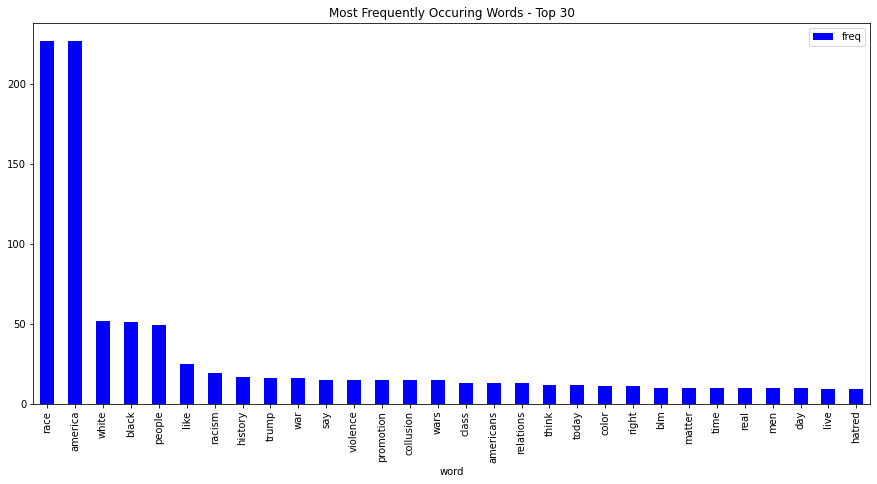

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

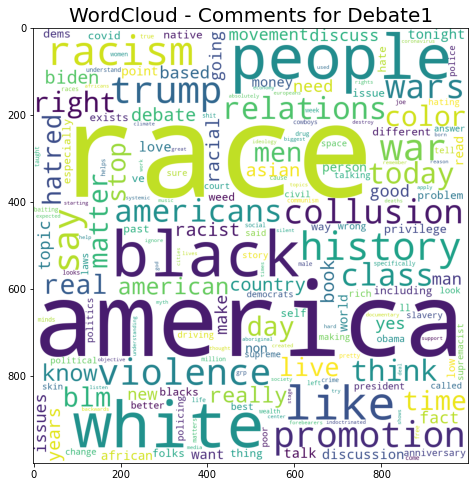

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

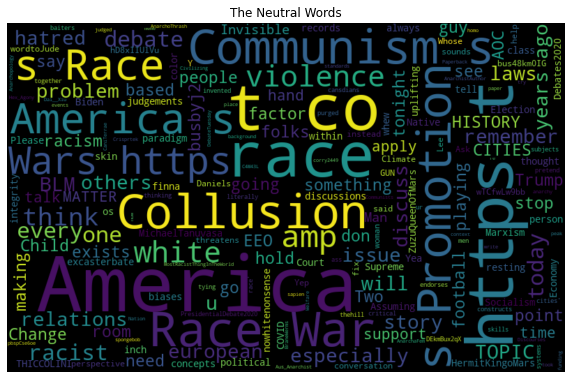

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

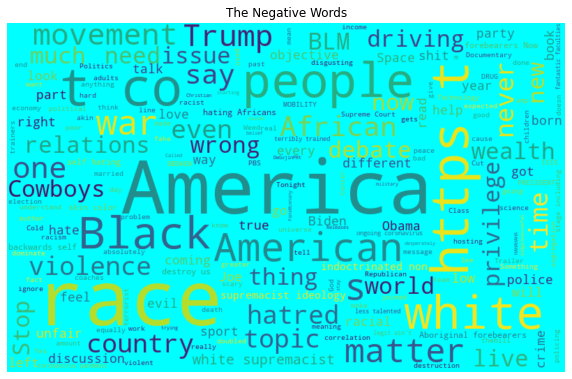

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

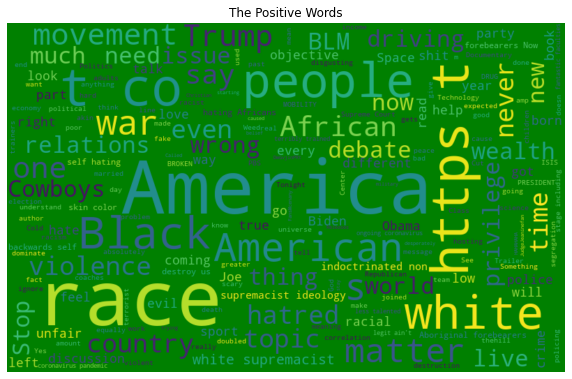

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,@THICCOLINI @ZuzuQueenOfMars @HermitKingoMars ...,Neutral
1,@omggblake @PeteButtigieg Oh really has Al Sha...,Positive
2,PBS Releases Trailer for DRIVING WHILE BLACK: ...,Negative
3,@FansMcenany @JudgeJeaninefan HAHAHAHA. How ca...,Negative
4,"@BarackObama In America, Black Lives Matter be...",Negative
...,...,...
205,@niespika @EPoe187 (Eg see “race in North Amer...,Positive
206,@MindUnguent @cmclymer Black people are not op...,Positive
207,@kalli1110 @tomshattuck Don’t you love “Virtue...,Positive
208,@nowthisnews Of course it is for him. He's ri...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,socialism like marxism is not within the nativ...
1,Positive,oh really has al sharpton paid his the biggest...
2,Negative,pbs releases trailer for driving while black r...
3,Negative,hahahaha how can you say that with a fake chri...
4,Negative,in america black lives matter because they are...
...,...,...
205,Positive,eg see race in north america for a discussion ...
206,Positive,black people are not oppressed in america toda...
207,Positive,don t you love virtue boy from diverse boxford...
208,Positive,of course it is for him he s rich rich always ...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,oh really has al sharpton paid his the biggest...
6,Positive,good jared you do realize many scientists debu...
8,Positive,i mean really if this is what they wanted for ...
16,Positive,chung romo is white and is absolutely treated ...
17,Positive,what and how the history of race in america is...
...,...,...
181,Negative,no greater race hustler in america than thomas...
183,Negative,i will admit freely to you i have absolutely b...
196,Negative,wow i am so sorry that happened to you that is...
197,Negative,hannah jones is not credible on any matter reg...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,oh really has al sharpton paid his the biggest...
6,1,good jared you do realize many scientists debu...
8,1,i mean really if this is what they wanted for ...
16,1,chung romo is white and is absolutely treated ...
17,1,what and how the history of race in america is...
...,...,...
181,0,no greater race hustler in america than thomas...
183,0,i will admit freely to you i have absolutely b...
196,0,wow i am so sorry that happened to you that is...
197,0,hannah jones is not credible on any matter reg...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(119, 2)
(40, 2)


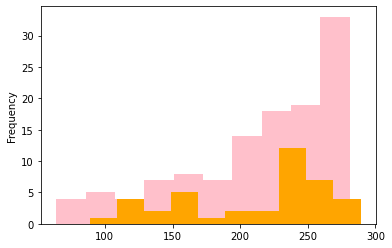

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(45175, 92380)

In [36]:
model_w2v.wv.most_similar(positive = "race")

[('hustler', 0.9985519647598267),
 ('greater', 0.9981473684310913),
 ('hispanic', 0.9981106519699097),
 ('politics', 0.9981043934822083),
 ('gets', 0.9980893731117249),
 ('knows', 0.9980788826942444),
 ('different', 0.9980090260505676),
 ('exists', 0.9979676008224487),
 ('two', 0.9979408383369446),
 ('those', 0.9978576898574829)]

In [37]:
model_w2v.wv.most_similar(negative = "t")

[('dems', -0.8033425211906433),
 ('today', -0.8522734045982361),
 ('grp', -0.8666010499000549),
 ('most', -0.8756580352783203),
 ('than', -0.8916676640510559),
 ('any', -0.9030818939208984),
 ('men', -0.9052734375),
 ('other', -0.9098747968673706),
 ('more', -0.9143844246864319),
 ('their', -0.9156664609909058)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(119, 500)
(119,)
(40, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.325
F1 score : 0.12903225806451613
[[11  2]
 [25  2]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.45
f1 score : 0.47619047619047616
[[ 8  5]
 [17 10]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.425
f1 score : 0.4888888888888889
[[ 6  7]
 [16 11]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9747899159663865
Validation Accuracy : 0.675
f1 score : 0.8059701492537313
[[ 0 13]
 [ 0 27]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 zombie fun fact the current testing in america i say this location specifically specifically is biased towards the specific race hence why its very euro centric heres an example 

First sample after preprocessing: 
 [481 482 125   1 483 484   2   4  17 101  31 485 146 146   8 486 487   1
 184   3 488  62 126 185 489 490 491 102 492   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
1/1 - 0s - loss: 0.6946 - accuracy: 0.4206 - val_loss: 0.6850 - val_accuracy: 0.5833
Epoch 2/20
1/1 - 0s - loss: 0.6804 - accuracy: 0.6168 - val_loss: 0.6797 - val_accuracy: 0.5833
Epoch 3/20
1/1 - 0s - loss: 0.6703 - accuracy: 0.6168 - val_loss: 0.6769 - val_accuracy: 0.5833
Epoch 4/20
1/1 - 0s - loss: 0.6636 - accuracy: 0.6168 - val_loss: 0.6761 - val_accuracy: 0.5833
Epoch 5/20
1/1 - 0s - loss: 0.6613 - accuracy: 0.6168 - val_loss: 0.6764 - val_accuracy: 0.5833
Epoch 6/20
1/1 - 0s - loss: 0.6575 - accuracy: 0.6168 - val_loss: 0.6776 - val_accuracy: 0.5833
Epoch 7/20
1/1 - 0s - loss: 0.6600 - accuracy: 0.6168 - val_loss: 0.6786 - val_accuracy: 0.5833
Epoch 8/20
1/1 - 0s - loss: 0.6554 - accuracy: 0.6168 - val_loss: 0.6789 - val_accuracy: 0.5833
Epoch 9/20
1/1 - 0s - loss: 0.6578 - accuracy: 0.6168 - val_loss: 0.6783 - val_accuracy: 0.5833
Epoch 10/20
1/1 - 0s - loss: 0.6503 - accuracy: 0.6168 - val_loss: 0.6769 - val_accuracy: 0.5833
Epoch 11/20
1/1 - 0s - loss: 0.6455 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,socialism like marxism is not within the nativ...
1,1,oh really has al sharpton paid his the biggest...
2,0,pbs releases trailer for driving while black r...
3,0,hahahaha how can you say that with a fake chri...
4,0,in america black lives matter because they are...
...,...,...
205,1,eg see race in north america for a discussion ...
206,1,black people are not oppressed in america toda...
207,1,don t you love virtue boy from diverse boxford...
208,1,of course it is for him he s rich rich always ...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(157, 500)
(157,)
(53, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(157, 500)
(53, 500)
(157,)
(53,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.33962264150943394
F1 score : [0.53061224 0.1        0.21621622]
[[13  0  3]
 [ 6  1  7]
 [14  5  4]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.37735849056603776
f1 score : [0.56603774 0.27586207 0.08333333]
[[15  1  0]
 [10  4  0]
 [12 10  1]]


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.3018867924528302
f1 score : [0.43478261 0.32258065 0.06896552]
[[10  4  2]
 [ 6  5  3]
 [14  8  1]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8980891719745223
Validation Accuracy : 0.5660377358490566
f1 score : [0.64285714 0.         0.66666667]
[[ 9  1  6]
 [ 1  0 13]
 [ 2  0 21]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['ma am read the whole thing i ve read it already look for the part that speaks on american born asians also only of poor and low income people are married in america regardless of race black people are largely poor and low income which would explain the low marriage rate', 'y all remember when lee daniels said that this white woman would help fix race relations in america', 'evil science i ve only witnessed on a race white children makes you wonder where that dose is being made what country made in america course you won t believe me you should pure evil being done on infants toddlers and adults very true no one gives a shit', 'your response is disgusting and absolutely wrong that comment has nothing to do with race unbelievable she married her brother to get citizenship newsflash that is illegal in america', 'the first race riots here in america were against italians some of whom were my ancestors it might be different in europe but here in americ

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
2/2 - 0s - loss: 0.7043 - accuracy: 0.4610 - val_loss: 0.7034 - val_accuracy: 0.4375
Epoch 2/20
2/2 - 0s - loss: 0.6541 - accuracy: 0.2695 - val_loss: 0.7157 - val_accuracy: 0.4375
Epoch 3/20
2/2 - 0s - loss: 0.6204 - accuracy: 0.2695 - val_loss: 0.7301 - val_accuracy: 0.4375
Epoch 4/20
2/2 - 0s - loss: 0.5891 - accuracy: 0.2695 - val_loss: 0.7502 - val_accuracy: 0.4375
Epoch 5/20
2/2 - 0s - loss: 0.5729 - accuracy: 0.2695 - val_loss: 0.7773 - val_accuracy: 0.4375
Epoch 6/20
2/2 - 0s - loss: 0.5533 - accuracy: 0.2695 - val_loss: 0.8053 - val_accuracy: 0.4375
Epoch 7/20
2/2 - 0s - loss: 0.5361 - accuracy: 0.2695 - val_loss: 0.8280 - val_accuracy: 0.4375
Epoch 8/20
2/2 - 0s - loss: 0.5329 - accuracy: 0.2695 - val_loss: 0.8372 - val_accuracy: 0.4375
Epoch 9/20
2/2 - 0s - loss: 0.5321 - accuracy: 0.2695 - val_loss: 0.8366 - val_accuracy: 0.4375
Epoch 10/20
2/2 - 0s - loss: 0.5186 - accuracy: 0.2695 - val_loss: 0.8397 - val_accuracy: 0.4375
Epoch 11/20
2/2 - 0s - loss: 0.5121 - a